# The cheapest time to cook Christmas duck 🦆

In [1]:
# Import necessary libraries
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the dataset from a URL
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the content of the response
    dataset_content = response.text

    # Save the content to a CSV file
    with open("Electricity.csv", "w") as file:
        file.write(dataset_content)

    print("Dataset downloaded and saved as 'Electricity.csv'")
else:
    print("Failed to download the dataset. Status code:", response.status_code)

Dataset downloaded and saved as 'Electricity.csv'


In [3]:
# Define data types for each column in the dataset
dtype_mapping = {
    "ForecastWindProduction": float,
    "SystemLoadEA": float,
    "SMPEA": float,
    "ORKTemperature": float,
    "ORKWindspeed": float,
    "CO2Intensity": float,
    "ActualWindProduction": float,
    "SystemLoadEP2": float,
    "SMPEP2": float,
    "PeriodOfDay": int,  # Assuming it's an integer column
}

In [4]:
# Read the data from 'Electricity.csv' into a pandas DataFrame
# Replace '?' with NaN during the reading process
df = pd.read_csv("Electricity.csv", dtype=dtype_mapping, na_values='?')

In [6]:
# Data Preprocessing
# Convert the "DateTime" column to a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed')

# Extract the hour from the DateTime column
df['Hour'] = df['DateTime'].dt.hour

In [7]:
# Analyze the dataset
# Calculate the average electricity cost for each period of the day
average_cost_by_hour = df.groupby('Hour')['SMPEA'].mean()

# Find the period with the lowest average cost
cheapest_hour = average_cost_by_hour.idxmin()

In [8]:
# Display the result
print(f"The cheapest time to cook your Christmas duck is at {cheapest_hour}:00")

The cheapest time to cook your Christmas duck is at 4:00


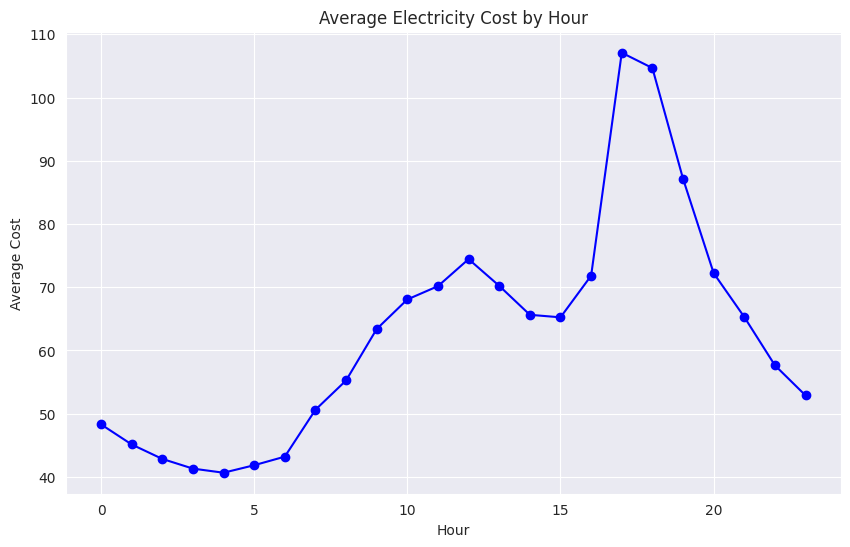

In [9]:
# Plotting the average electricity cost by hour
plt.figure(figsize=(10, 6))
plt.plot(average_cost_by_hour.index, average_cost_by_hour.values, marker='o', linestyle='-', color='b')
plt.title("Average Electricity Cost by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Cost")
plt.grid(True)
plt.show()

/tmp/ipykernel_6028/1807436987.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Hour', y='SMPEA', ci=None, color='b')


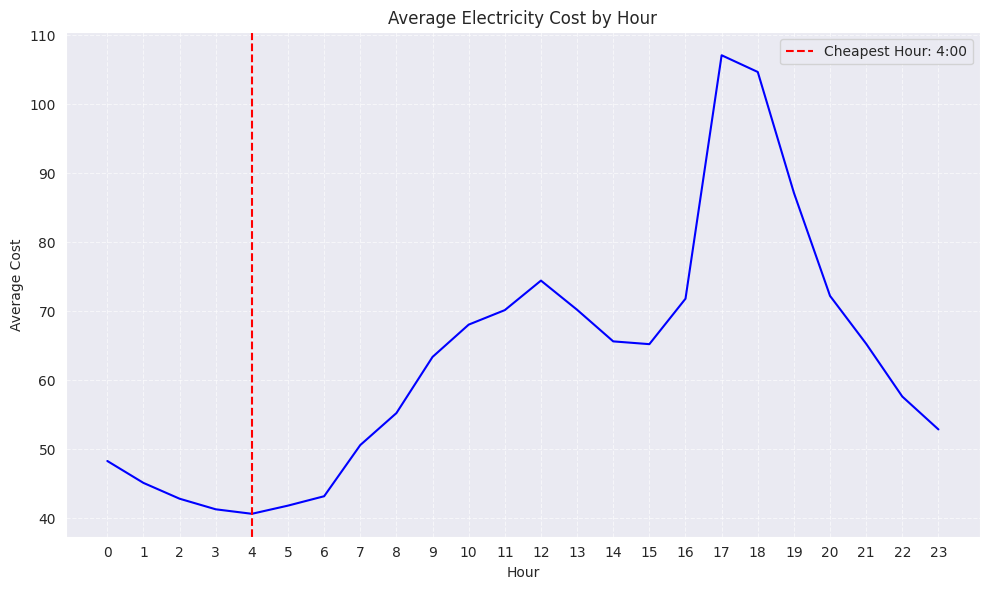

In [10]:
# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Hour', y='SMPEA', ci=None, color='b')
plt.title("Average Electricity Cost by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Cost")
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Highlight the cheapest hour
plt.axvline(x=cheapest_hour, color='r', linestyle='--', label=f"Cheapest Hour: {cheapest_hour}:00")
plt.legend()
plt.show()

In this project, we focused on saving energy and money by finding the best times to do energy-heavy tasks, like cooking. We created a simple, helpful graph that shows when electricity costs are low and high during the day. This lets people choose the cheapest times to use electricity wisely. Our goal was to help people save money and use energy in a more sustainable way.

In [11]:
# Descriptive Statistics
print("Descriptive Statistics for SMPEA (Electricity Cost):")
print(df['SMPEA'].describe())

# Correlation Analysis
correlation_matrix = df[['SMPEA', 'SystemLoadEA', 'CO2Intensity']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics for SMPEA (Electricity Cost):
count    38012.000000
mean        62.720388
std         32.252334
min          0.000000
25%         45.530000
50%         55.230000
75%         70.320000
max        587.580000
Name: SMPEA, dtype: float64

Correlation Matrix:
                 SMPEA  SystemLoadEA  CO2Intensity
SMPEA         1.000000      0.532754     -0.085590
SystemLoadEA  0.532754      1.000000     -0.208044
CO2Intensity -0.085590     -0.208044      1.000000


Electricity cost is influenced by energy load and, to a lesser extent, carbon intensity. However, the correlations are not strong, indicating that other factors may also play a significant role in determining electricity cost.